# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [71]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv(r"..\Pratica\CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [72]:
#seu código aqui
#Carregar a base e verficar os tipos de dados existentes
print(df.info())

# Agora que temos os Dtypes, vamos verificar os dados unicos que tem em cada coluna
colunas = df.columns
for i in colunas:

    print(f'Para a coluna {i}, temos os seguintes valores unicos {df[i].unique()}')
    print("=====================================")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

### Analise sobre os dados da base
Pelo retorno dos dados únicos, poderíamos descartar qualquer avaliação de mudança nas colunas 'customerID', 'Genero', 'Tempo_como_Cliente', 'Pagamento_Mensal' e 
'Total_Pago', pois são dados que apresentam uma correspondência adequada para seus valores.

Agora as colunas 'Casado', 'Dependents', 'PhoneService', 'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV' e 'Churn', podem ser transformadas.
Avalio que possam ser transformados em binários (0 e 1), onde 0 = Não e 1 = Sim.

OBS:
As colunas 'Servico_Seguranca', 'Suporte_Tecnico' e 'StreamingTV'. iram receber o valor 0 para a descrição de 'No internet service'.
Motivo:
  1) Na coluna 'Servico_Internet' já existe a informação de clinetes que não possuem o serviço de internet. tornando dados redundantes
  2) Serviços de segurança e suporte técnico, não necessariamente dependentes exclusivamente do serviço de internet.


In [73]:
# Transformando os dados 
# Casado
df['Casado'] = df['Casado'].map({'Yes': 1, 'No': 0})

#Dependents
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

#PhoneService
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

#Servico_Seguranca
df['Servico_Seguranca'] = df['Servico_Seguranca'].map({'Yes': 1, 'No': 0, 'No internet service' : 0})

#Suporte_Tecnico
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].map({'Yes': 1, 'No': 0, 'No internet service' : 0})

#StreamingTV
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service' : 0})

#Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Agora que temos os dados transformados, vamos verificar se realmente foram transformados
print(df.info())

colunas = df.columns
for i in colunas:

    print(f'Para a coluna {i}, temos os seguintes valores unicos {df[i].unique()}')
    print("=====================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   int64  
 4   Dependents          2500 non-null   int64  
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   float64
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   int64  
 9   Suporte_Tecnico     2500 non-null   int64  
 10  StreamingTV         2500 non-null   int64  
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   float64
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [74]:
#seu código aqui
# existem valores nulos na base?
print(f'Existem valores nulos na base?: {df.isnull().values.any()} \n')

#Qual a quantidade de valor nulos por coluna?
print(f'Dados quantitativos de nulos : \n{df.isnull().sum()}\n')

# Qual a porcentagem de valores nulos por coluna?
print(f'Percentual de dados nulos: \n{(df.isnull().sum()/len(df))*100}\n')

Existem valores nulos na base?: True 

Dados quantitativos de nulos : 
customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

Percentual de dados nulos: 
customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: 

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

### Justificativa da exclusão

Avaliando as boas práticas em função da quantidade de dados da amostra que temos. iremos apagar as linhas com dados faltantes nas colunas 'Genero' e 'Churn'. Pois apresentam uma quantidade de dados nulos irrisório e não afetará a análise futura.

In [75]:
#seu código aqui
# Excluindo linhas com registro nulo da coluna 'Genero'
df.dropna(subset=['Genero'], inplace=True)

# Excluindo linhas com registro nulo da coluna 'Churn'
df.dropna(subset=['Churn'], inplace=True)

# verificando dados nulos novamente
print(f'Percentual de dados nulos: \n{(df.isnull().sum()/len(df))*100}\n')

Percentual de dados nulos: 
customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64



C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

### Justificativa
Para a coluna 'PhoneService', vamos realizar a substituição dos dados pela moda, pois há uma grande chance de que os clientes tenham uma linha telefônica ativa pelas amostragens dos dados

Para a coluna 'Pagamento_Mensal' utilizaremos a média para realizar a substituição, pois apresentam mais dados e consequentemente uma validação mais aproximada de quanto cada cliente pode estar pagando. Outro fato é que a média não está tão próxima da mediana em função do número de clientes que pagam um valor muito baixo.


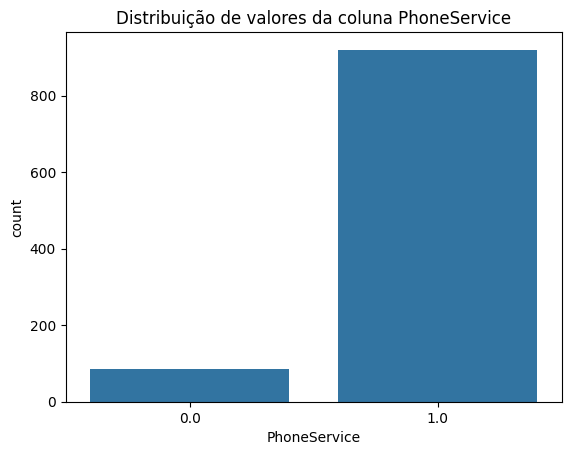

In [76]:
# grafico de barras para validar a quantidade de valores nulos e com valores da coluna 'PhoneService'
sns.countplot(x='PhoneService', data=df)
plt.title('Distribuição de valores da coluna PhoneService')
plt.show()

In [77]:
#seu código aqui
# Para PhoneService

# verificando a moda
print(f'Moda PhoneService: {df["PhoneService"].mode()}')

#verificando quantas vezes a moda aparece 
print(f'Quantidade de vezes que a moda aparece: {df["PhoneService"].value_counts()}')

# Agora vamos substituir os valores nulos pela moda
df['PhoneService'].fillna(1, inplace=True)

# verificando dados nulos novamente
print(f'Percentual de dados nulos: \n{(df.isnull().sum()/len(df))*100}\n')

Moda PhoneService: 0    1.0
Name: PhoneService, dtype: float64
Quantidade de vezes que a moda aparece: PhoneService
1.0    920
0.0     86
Name: count, dtype: int64
Percentual de dados nulos: 
customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService           0.000000
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64



C:\Users\rodri\AppData\Local\Temp\ipykernel_13168\2945890235.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [78]:
#seu código aqui
# Para Pagamento_Mensal

# verificando a media e a mediana 
print(f'Media Pagamento_Mensal: {df["Pagamento_Mensal"].mean()}')
print(f'Mediana Pagamento_Mensal: {df["Pagamento_Mensal"].median()}')
print(f'Valor mais alto Pagamento_Mensal: {df["Pagamento_Mensal"].max()}')
print(f'Valor mais baixo Pagamento_Mensal: {df["Pagamento_Mensal"].min()}')

Media Pagamento_Mensal: 65.60756321839081
Mediana Pagamento_Mensal: 71.45
Valor mais alto Pagamento_Mensal: 118.65
Valor mais baixo Pagamento_Mensal: 18.4


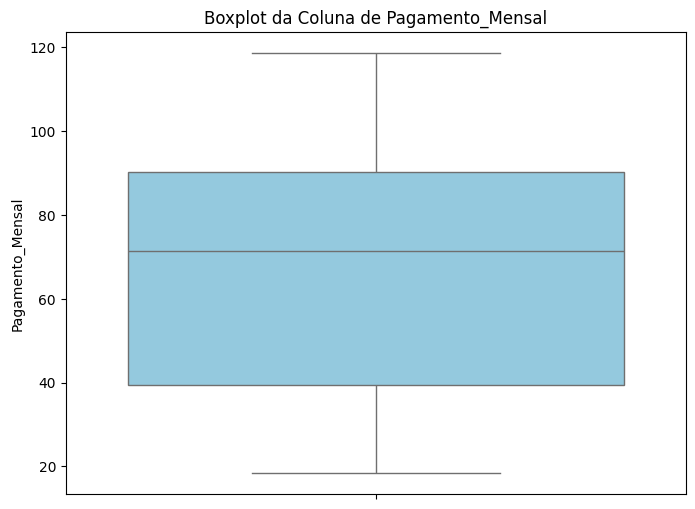

In [79]:
# Boxplot para verificar os outliers do 'Pagamento_mensal'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

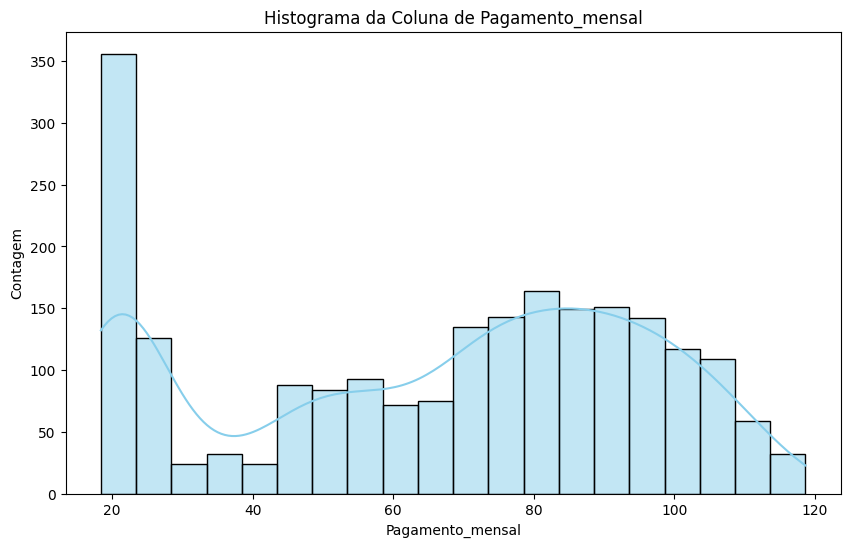

In [80]:
# Plotando um histograma dos 'Pagamento_mensal' para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Pagamento_mensal')
plt.xlabel('Pagamento_mensal')
plt.ylabel('Contagem')
plt.show()

In [81]:
# Substitui os valores faltantes na coluna 'Pagamento_Mensal' pela média
media_pagamento_mensal = df['Pagamento_Mensal'].mean()
df['Pagamento_Mensal'].fillna(media_pagamento_mensal, inplace=True)
# verificando dados nulos novamente 
print(f'Percentual de dados nulos: \n{(df.isnull().sum()/len(df))*100}\n')


Percentual de dados nulos: 
customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
dtype: float64



C:\Users\rodri\AppData\Local\Temp\ipykernel_13168\2206554736.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [82]:
#seu código aqui
# Agora que temos os Dtypes, vamos verificar os dados unicos que tem em cada coluna
colunas = df.columns
for i in colunas:

    print(f'Para a coluna {i}, temos os seguintes valores unicos {df[i].unique()}')
    print("=====================================")

Para a coluna customerID, temos os seguintes valores unicos ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Para a coluna Genero, temos os seguintes valores unicos ['Female' 'Male' 'F' 'M' 'f']
Para a coluna Idoso, temos os seguintes valores unicos [0 1]
Para a coluna Casado, temos os seguintes valores unicos [1 0]
Para a coluna Dependents, temos os seguintes valores unicos [0 1]
Para a coluna Tempo_como_Cliente, temos os seguintes valores unicos [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Para a coluna PhoneService, temos os seguintes valores unicos [0. 1.]
Para a coluna Servico_Internet, temos os seguintes valores unicos ['DSL' 'No' 'Fiber optic' 'dsl']
Para a coluna Servico_Seguranca, temos os seguintes valores unicos [0 1]
Para a coluna Suporte_Tecnico, temos os seguin

In [87]:
# Os dados que serão atualizados são
# - Genero
# - dados em minusculo
df['Genero'] = df['Genero'].str.lower()
df['Genero'] = df['Genero'].str.replace('female', 'f')
df['Genero'] = df['Genero'].str.replace('male', 'm')

# - Servico_Internet
df['Servico_Internet'] = df['Servico_Internet'].str.lower()
# - Tipo_Contrato
df['Tipo_Contrato'] = df['Tipo_Contrato'].str.lower()
# - PaymentMethod
df['PaymentMethod'] = df['PaymentMethod'].str.lower()

# Agora que temos os Dtypes, vamos verificar os dados unicos que tem em cada coluna
colunas = df.columns
for i in colunas:

    print(f'Para a coluna {i}, temos os seguintes valores unicos {df[i].unique()}')
    print("=====================================")

Para a coluna customerID, temos os seguintes valores unicos ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Para a coluna Genero, temos os seguintes valores unicos ['f' 'm']
Para a coluna Idoso, temos os seguintes valores unicos [0 1]
Para a coluna Casado, temos os seguintes valores unicos [1 0]
Para a coluna Dependents, temos os seguintes valores unicos [0 1]
Para a coluna Tempo_como_Cliente, temos os seguintes valores unicos [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Para a coluna PhoneService, temos os seguintes valores unicos [0. 1.]
Para a coluna Servico_Internet, temos os seguintes valores unicos ['dsl' 'no' 'fiber optic']
Para a coluna Servico_Seguranca, temos os seguintes valores unicos [0 1]
Para a coluna Suporte_Tecnico, temos os seguintes valores unicos [0 1]
P

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [90]:
# Vamos renomear os nomes das colunas para inglês
df.rename(columns={'Genero': 'Gender'}, inplace=True)
df.rename(columns={'Idoso': 'Elderly'}, inplace=True)
df.rename(columns={'Casado': 'Married'}, inplace=True)
df.rename(columns={'Casado': 'Married'}, inplace=True)
df.rename(columns={'Tempo_como_Cliente': 'Time_as_a_customer'}, inplace=True)
df.rename(columns={'Servico_Internet': 'Internet_Service'}, inplace=True)
df.rename(columns={'Servico_Seguranca': 'Security_Service'}, inplace=True)
df.rename(columns={'Suporte_Tecnico': 'Technical_Support'}, inplace=True)
df.rename(columns={'Total_Pago': 'Total_Paid'}, inplace=True)

# verificando os nomes das colunas
print(df.columns)

Index(['customerID', 'Gender', 'Elderly', 'Married', 'Dependents',
       'Time_as_a_customer', 'PhoneService', 'Internet_Service',
       'Security_Service', 'Technical_Support', 'StreamingTV', 'Tipo_Contrato',
       'PaymentMethod', 'Pagamento_Mensal', 'Total_Paid', 'Churn'],
      dtype='object')
